In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Flatten, Dense, Dropout, Normalization
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [17]:
df = pd.read_csv('/kaggle/input/chatgpt-sentiment-analysis/file.csv')


In [18]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [19]:
df.shape

(219294, 3)

In [20]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

df['tweets'] = df['tweets'].apply(remove_html_tags)

df.head()

/tmp/ipykernel_37/4203560267.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')
/tmp/ipykernel_37/4203560267.py:2: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [21]:
punctuation = string.punctuation

# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['tweets'] = df['tweets'].apply(remove_punctuation)


# Lowercasing the text
df['tweets'] = df['tweets'].str.lower()

df.head()

,Unnamed: 0,tweets,labels
0,0,chatgpt optimizing language models for dialogu...,neutral
1,1,try talking with chatgpt our new ai system whi...,good
2,2,chatgpt optimizing language models for dialogu...,neutral
3,3,thrilled to share that chatgpt our new model o...,good
4,4,as of 2 minutes ago openai released their new ...,bad


In [22]:
# Initialize the tokenizer
tokenizer = Tokenizer()

sentences = df['tweets']

# Fit the tokenizer on the dataset
tokenizer.fit_on_texts(sentences)

In [23]:
# Tokenize the sentences (convert to sequences of integers)
sequences = tokenizer.texts_to_sequences(sentences)

# Count total words in the dataset
# The total number of words across all sentences
total_words = sum(len(sentence.split()) for sentence in sentences)

# The total number of unique words in the dataset
unique_words = len(tokenizer.word_index)

# Maximum length of a sentence
max_len = max(len(seq) for seq in sequences)

# Pad the sequences
# You can set a maximum length for padding (e.g., 6), or pad to the longest sequence in the dataset
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_len)

In [24]:
df['labels'].unique()

array(['neutral', 'good', 'bad'], dtype=object)

In [25]:
df['labels'] = df['labels'].map({
    'bad':0,
    'good':1,
    'neutral':2
})

In [26]:
# Splitting the input sequences into X and y data
X = padded_sequences
y = df['labels']

In [27]:
y = keras.utils.to_categorical(y, num_classes=3)

In [28]:
model = Sequential()

model.add(LSTM(256, input_shape=(61,1), return_sequences=True))
          
model.add(LSTM(128))
model.add(Normalization())

model.add(Dense(64, activation='relu'))  

model.add(Dense(3, activation='softmax')) 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Training Model
history = model.fit(X, y, epochs=100, batch_size=128)

Epoch 1/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.5346 - loss: 0.9852
Epoch 2/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.5397 - loss: 0.9727
Epoch 3/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.5402 - loss: 0.9670
Epoch 4/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.5428 - loss: 0.9616
Epoch 5/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.5459 - loss: 0.9552
Epoch 6/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.5474 - loss: 0.9514
Epoch 7/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.5510 - loss: 0.9450
Epoch 8/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.5512 - loss: 0.9411
Epoch 9/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.5546 - loss: 0.9344
Epoch 10/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.5544 - loss: 0.9320
Epoch 11/100
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.5616 - loss: 0.92

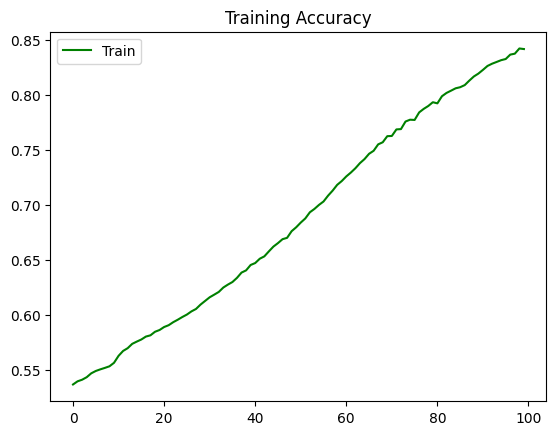

In [31]:
plt.title('Training Accuracy')

plt.plot(history.history['accuracy'], color='Green',label='Train')

plt.legend()

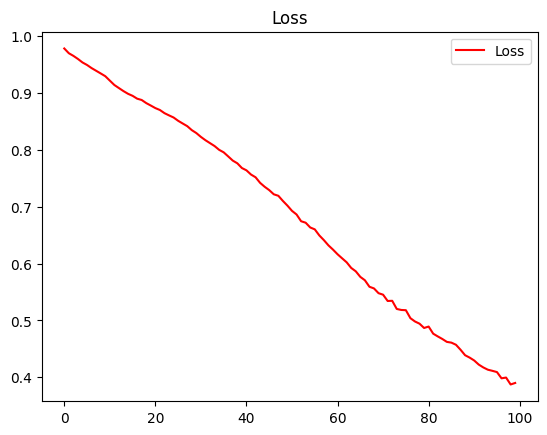

In [32]:
plt.title('Loss')

plt.plot(history.history['loss'], color='red',label='Loss')

plt.legend()

In [33]:
# Save the trained model
model.save('sentiment_analysis_model.h5')

In [34]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from bs4 import BeautifulSoup
import string

# Load the pre-trained model
model = keras.models.load_model('sentiment_analysis_model.h5')

# Function to preprocess new tweets
def preprocess_tweet(tweet):
    # Remove HTML tags
    soup = BeautifulSoup(tweet, 'html.parser')
    tweet = soup.get_text()
    
    # Remove punctuation
    punctuation = string.punctuation
    tweet = tweet.translate(str.maketrans('', '', punctuation))
    
    # Lowercase the text
    tweet = tweet.lower()
    
    # Tokenize the tweet
    sequence = tokenizer.texts_to_sequences([tweet])
    
    # Pad the sequence
    padded_sequence = pad_sequences(sequence, padding='post', maxlen=model.input_shape[1])  # Use model's max length
    
    return padded_sequence

# Example tweets for prediction
new_tweets = [
    "I love this product! It's amazing and works great!",
    "This is the worst experience I've ever had.",
    "It's okay, not the best but not the worst."
]

# Preprocess the new tweets
preprocessed_tweets = [preprocess_tweet(tweet) for tweet in new_tweets]

# Make predictions
predictions = [model.predict(tweet) for tweet in preprocessed_tweets]

# Convert predictions to labels
predicted_labels = [np.argmax(prediction) for prediction in predictions]

# Map the numerical labels back to original sentiment labels
label_map = {0: 'bad', 1: 'good', 2: 'neutral'}
predicted_sentiments = [label_map[label] for label in predicted_labels]

# Display the results
for tweet, sentiment in zip(new_tweets, predicted_sentiments):
    print(f'Tweet: "{tweet}" -> Sentiment: {sentiment}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tweet: "I love this product! It's amazing and works great!" -> Sentiment: good
Tweet: "This is the worst experience I've ever had." -> Sentiment: bad
Tweet: "It's okay, not the best but not the worst." -> Sentiment: bad
